<a href="https://colab.research.google.com/github/trodrigue1304/Fraud_detection_algorithm/blob/master/Missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Chargement des packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import sklearn as skl

In [3]:
from google.colab import drive

drive.mount('/content/drive')
train_identity=pd.read_csv('/content/drive/My Drive/projet python/train_identity.csv')
train_transaction=pd.read_csv('/content/drive/My Drive/projet python/train_transaction.csv')
test_identity=pd.read_csv('/content/drive/My Drive/projet python/test_identity.csv')
test_transaction=pd.read_csv('/content/drive/My Drive/projet python/test_transaction.csv')

Mounted at /content/drive


In [4]:
#verifier que toutes les TransactionID de id_train existe dans tr_train
print(train_identity.shape)
print(train_transaction.shape)
print(train_identity['TransactionID'].nunique())
print(train_transaction['TransactionID'].nunique())
print("Proportion de transactions avec id information (train): "+"{:.2%}".format(np.sum(train_transaction['TransactionID'].isin(train_identity['TransactionID'].unique()))/train_transaction['TransactionID'].nunique()))
print("Proportion de transactions avec id information (test): "+"{:.2%}".format(np.sum(test_transaction['TransactionID'].isin(test_identity['TransactionID'].unique()))/test_transaction['TransactionID'].nunique()))
print("On remarque qu'il y a des transactions sans informations d'identification. On ne tiendra pas compte de ces données.")


(144233, 41)
(590540, 394)
144233
590540
Proportion de transactions avec id information (train): 24.42%
Proportion de transactions avec id information (test): 28.01%
On remarque qu'il y a des transactions sans informations d'identification. On ne tiendra pas compte de ces données.


In [5]:
# Fusion des données suivant les ID
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='right')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='right')


In [6]:
## Exploration des données : Données manquantes et typologie
train.dtypes

missing_data=train.isnull().sum().sum()
print(missing_data)
total_data=np.product(train.shape)
print("% of missing data : "+"{:.2%}".format(missing_data/total_data))

16834880
% of missing data : 26.89%


<BarContainer object of 434 artists>

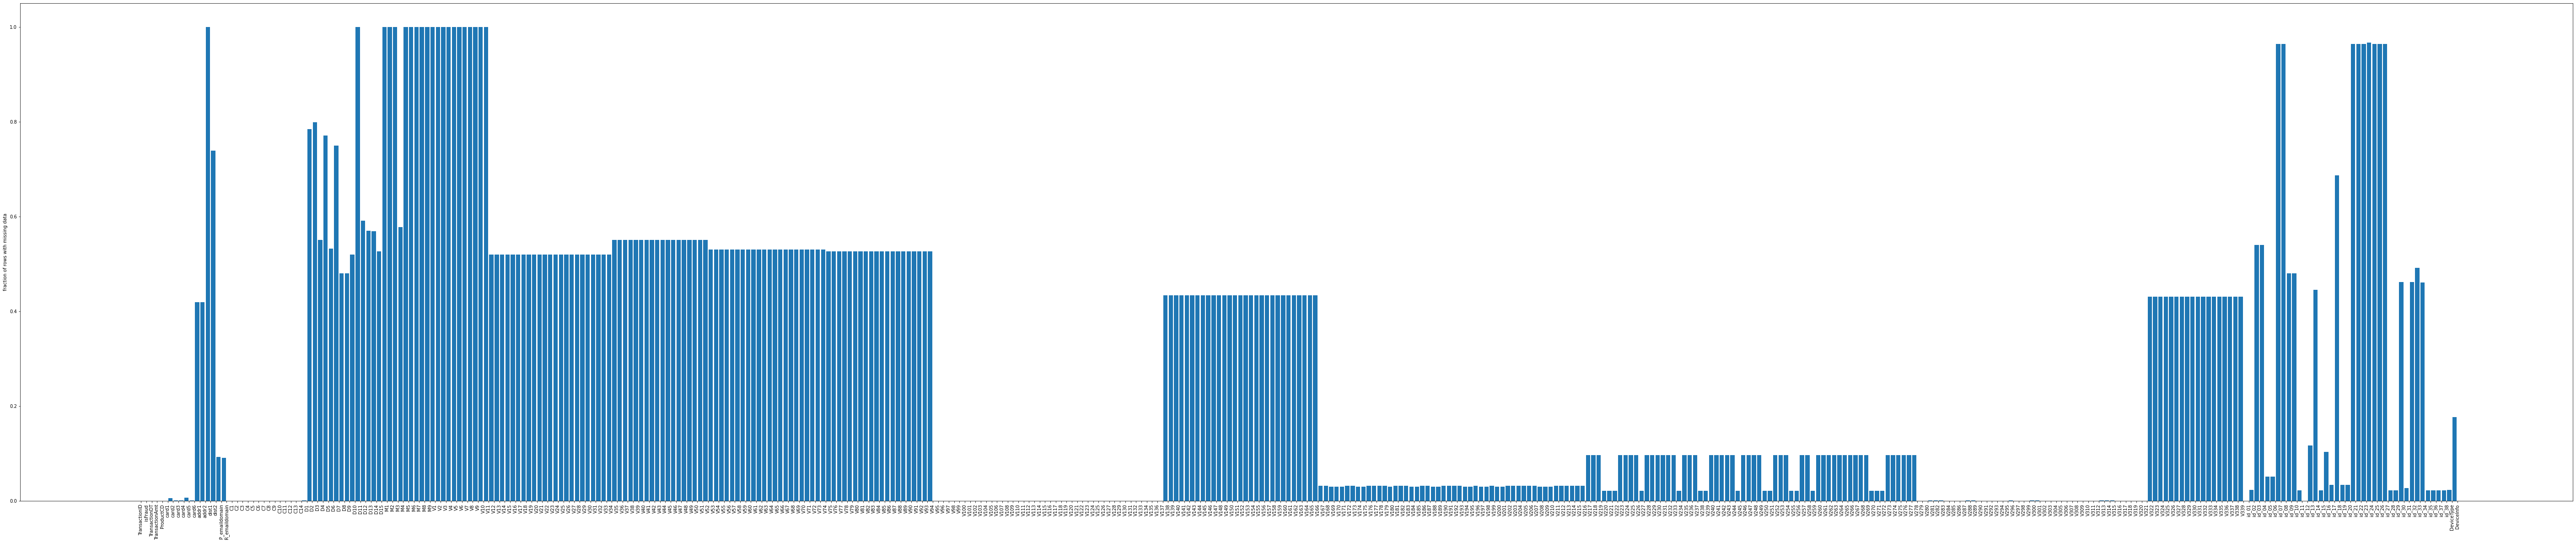

In [8]:
null_counts = train.isnull().sum()/len(train)
plt.figure(figsize=(100,20))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [9]:
## Afin de faciliter l'analyse, on retire des diagnostiques suivants les variables qui n'ont pas de données manquantes
## De plus dans un premier temps on sépare les variables suivant les palliers (20%, 40%, 60%, 80%) de données manquantes pour faciliter la visualisation
train_column_miss = train.isnull().any()
print(f'Nombre de variables avec des données manquantes (apprentissage) : {train_column_miss.sum()} .')
columns_with_missing_values = train_column_miss[train_column_miss.values].reset_index()['index']
train_data_miss = train.filter(items=columns_with_missing_values)
train_data_miss_20 = train_data_miss.filter(items=null_counts[(null_counts>0) & (null_counts<0.2)].reset_index()['index'])
train_data_miss_40 = train_data_miss.filter(items=null_counts[(null_counts>=0.2) & (null_counts<0.4)].reset_index()['index'])
train_data_miss_60 = train_data_miss.filter(items=null_counts[(null_counts>=0.4) & (null_counts<0.6)].reset_index()['index'])
train_data_miss_80 = train_data_miss.filter(items=null_counts[(null_counts>=0.6) & (null_counts<0.8)].reset_index()['index'])
train_data_miss_100 = train_data_miss.filter(items=null_counts[null_counts>=0.8].reset_index()['index'])

Nombre de variables avec des données manquantes (apprentissage) : 412 .


In [10]:
## Fonction pour la comparaison des données manquantes entre observations frauduleuses ou non
def plot_missingness(data1, data2, columns_with_missing_values ,plot1_title, plot2_title):
    ## Noms de variables
    labels = []

    # Proportions
    percentcount_fraud = []
    percentcount_nfraud = []
    for col in columns_with_missing_values:
        labels.append(col)
        percentcount_fraud.append(data1[col].isnull().sum() / data1.shape[0])
        percentcount_nfraud.append(data2[col].isnull().sum() / data2.shape[0])
    ind = np.arange(len(labels))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 18))

    rects = ax1.barh(ind, np.array(percentcount_fraud), color='blue')
    ax1.set_yticks(ind)
    ax1.set_yticklabels(labels, rotation='horizontal')
    ax1.set_xlabel(plot1_title)
    ax1.set_title("Variables à données manquantes")

    rects = ax2.barh(ind, np.array(percentcount_nfraud), color='pink')
    ax2.set_yticks(ind)
    ax2.set_yticklabels(labels, rotation='horizontal')
    ax2.set_xlabel(plot2_title)
    ax2.set_title("Variables à données manquantes")

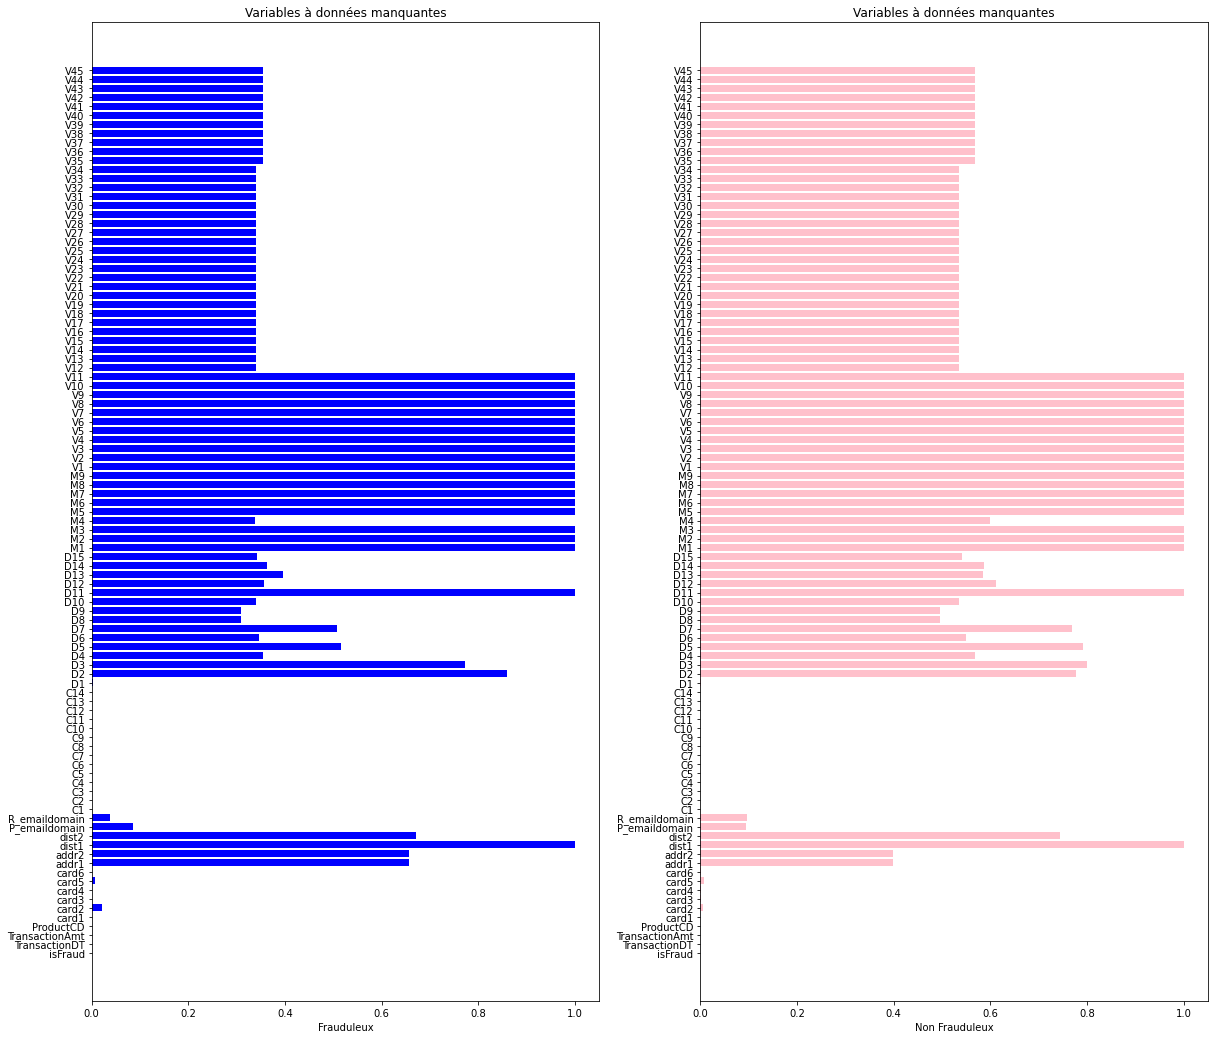

In [19]:
##En raison du nombre de variables, on va segmenter l'affichage par groupes de 100
plot_missingness(train.iloc[:, 1:100][train.isFraud == 1], train.iloc[:, 1:100][train.isFraud == 0], train.iloc[:, 1:100].columns ,"Frauduleux", "Non Frauduleux")

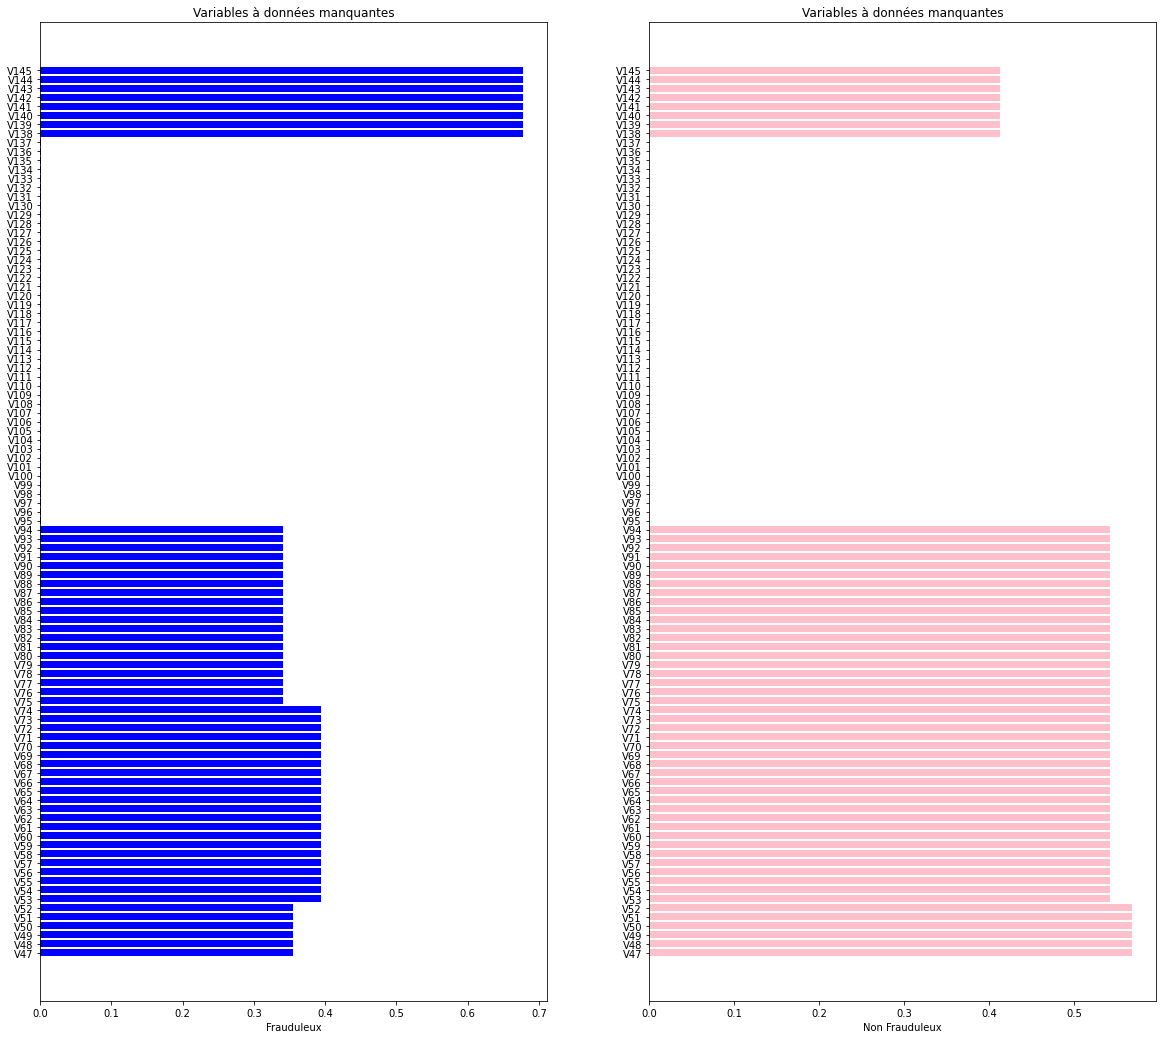

In [20]:
plot_missingness(train.iloc[:, 101:200][train.isFraud == 1], train.iloc[:, 101:200][train.isFraud == 0], train.iloc[:, 101:200].columns ,"Frauduleux", "Non Frauduleux")

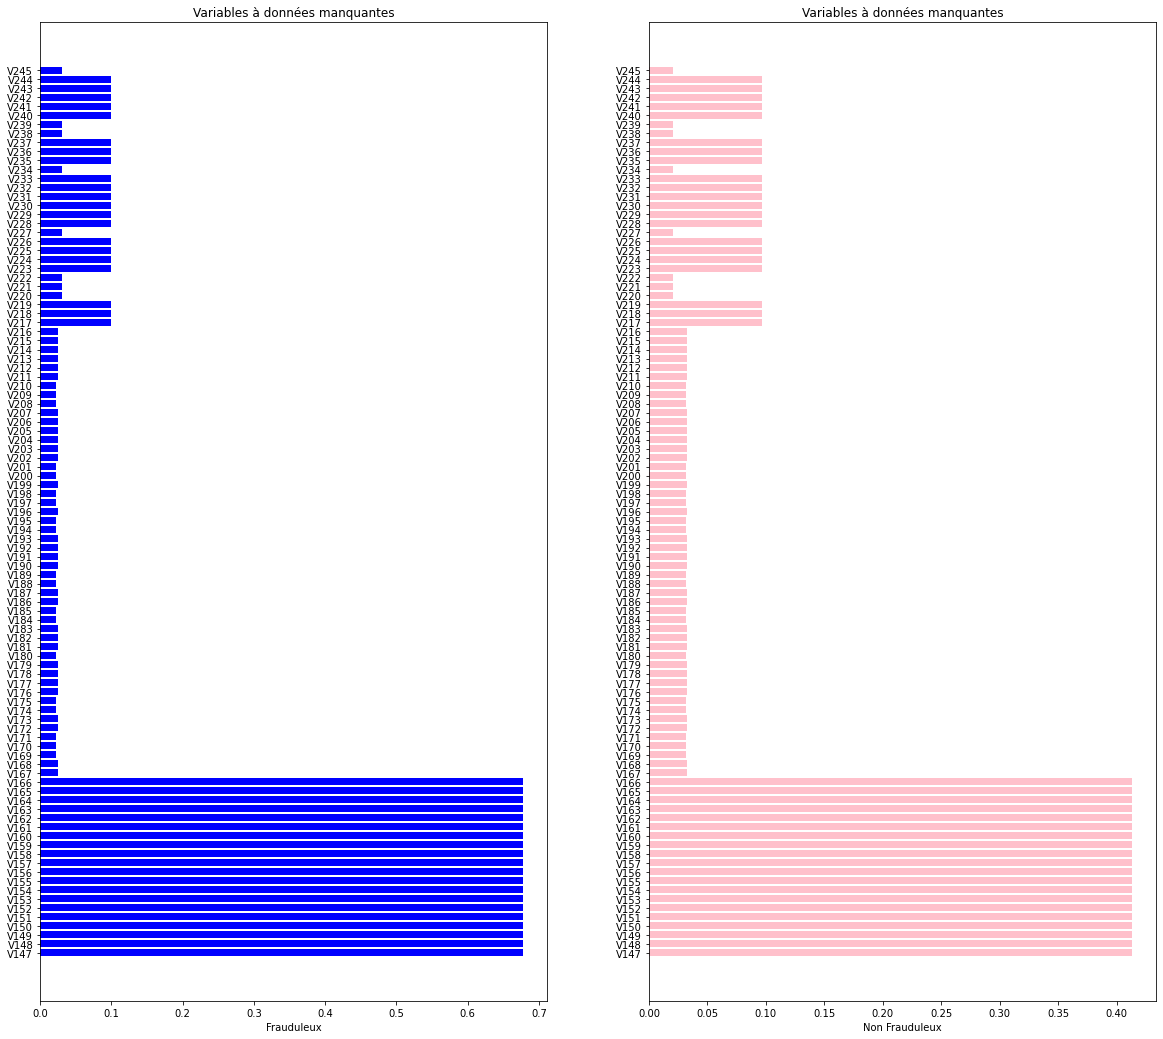

In [21]:
plot_missingness(train.iloc[:, 201:300][train.isFraud == 1], train.iloc[:, 201:300][train.isFraud == 0], train.iloc[:, 201:300].columns ,"Frauduleux", "Non Frauduleux")

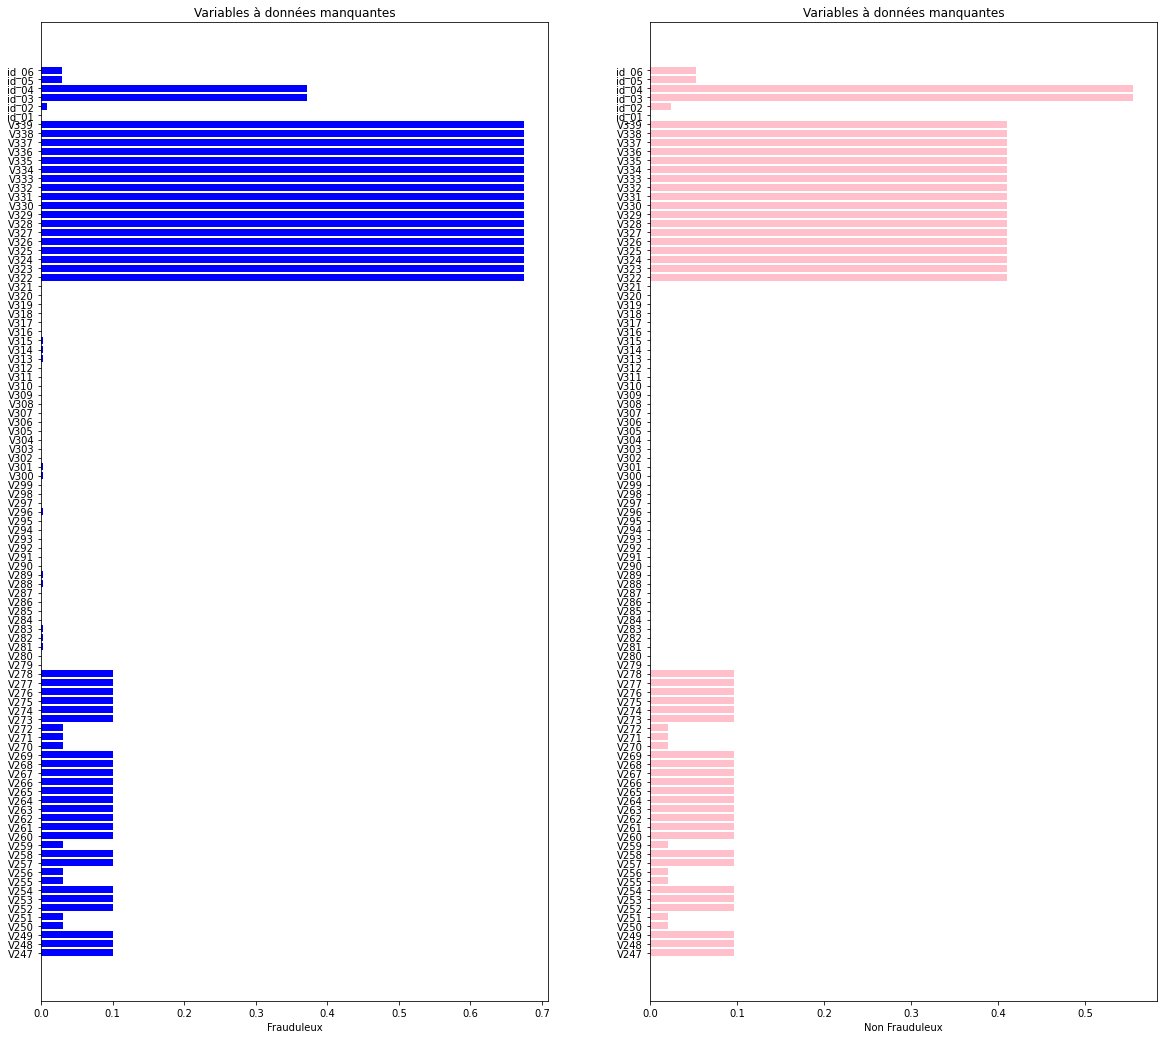

In [22]:
plot_missingness(train.iloc[:, 301:400][train.isFraud == 1], train.iloc[:, 301:400][train.isFraud == 0], train.iloc[:, 301:400].columns ,"Frauduleux", "Non Frauduleux")

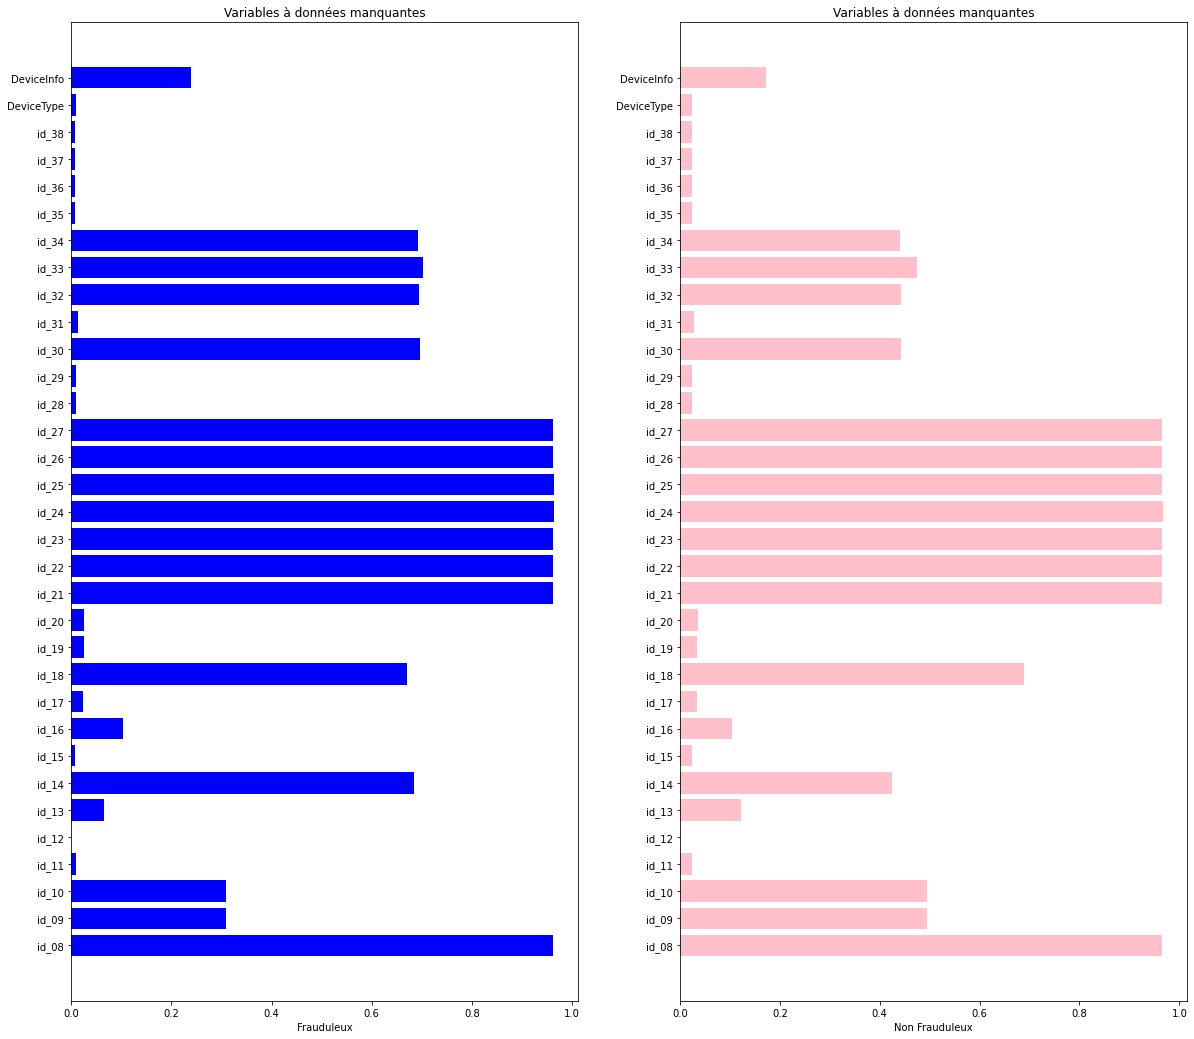

In [23]:
plot_missingness(train.iloc[:, 401:][train.isFraud == 1], train.iloc[:, 401:][train.isFraud == 0], train.iloc[:, 401:].columns ,"Frauduleux", "Non Frauduleux")

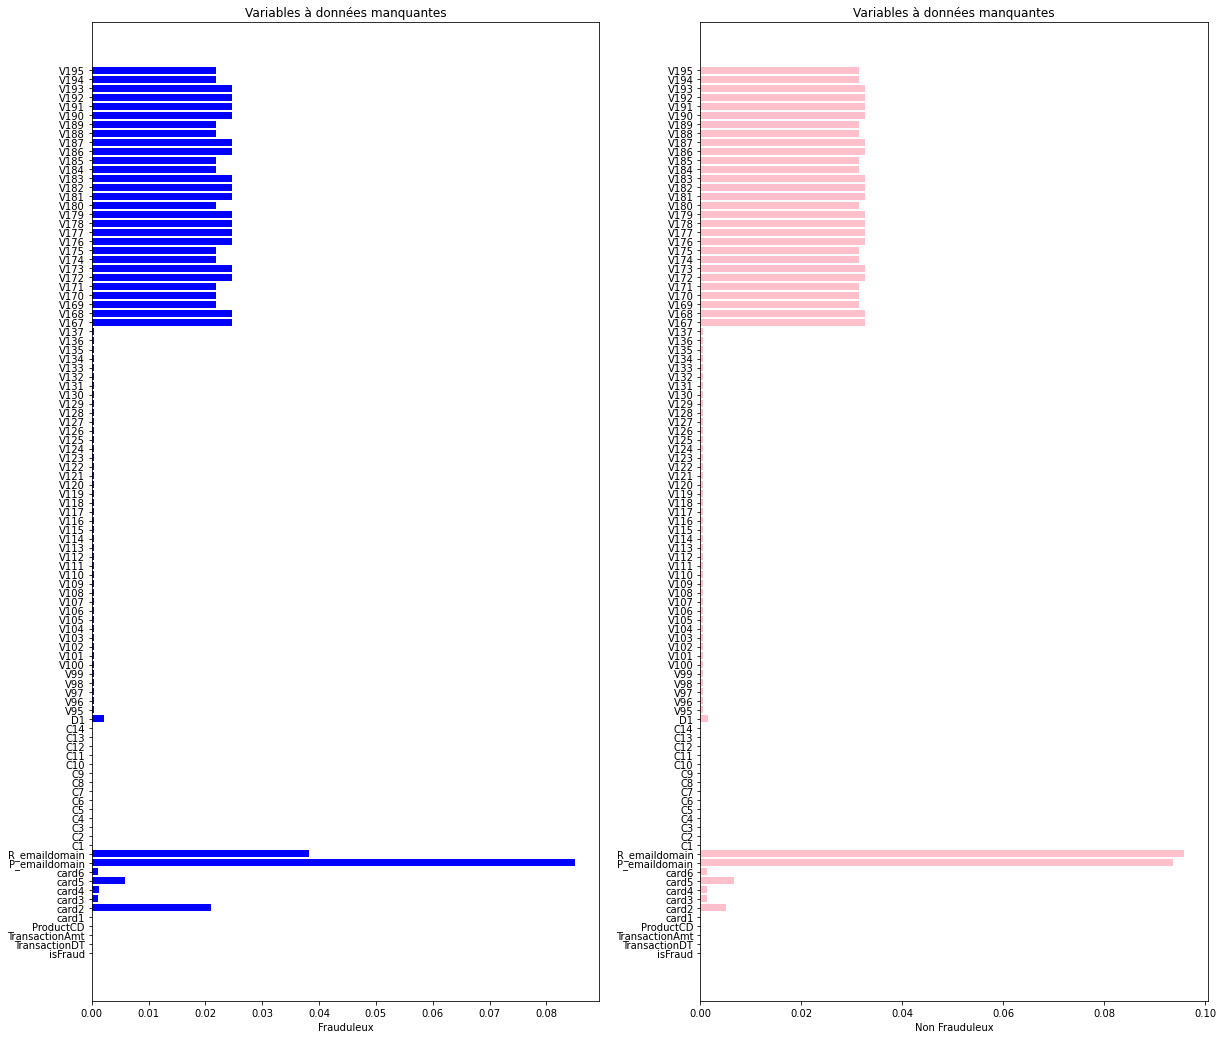

In [24]:
## On remarque que le fait d'être frauduleux ou non n'a pas une réelle influence sur le processus de génération des données manquantes
## On peut retirer les variables avec une trop grande proportion de données manquantes
train_data_explo = train.filter(items=null_counts[null_counts<0.2].reset_index()['index'])
plot_missingness(train_data_explo.iloc[:, 1:100][train_data_explo.isFraud == 1], train_data_explo.iloc[:, 1:100][train_data_explo.isFraud == 0], train_data_explo.iloc[:, 1:100].columns ,"Frauduleux", "Non Frauduleux")

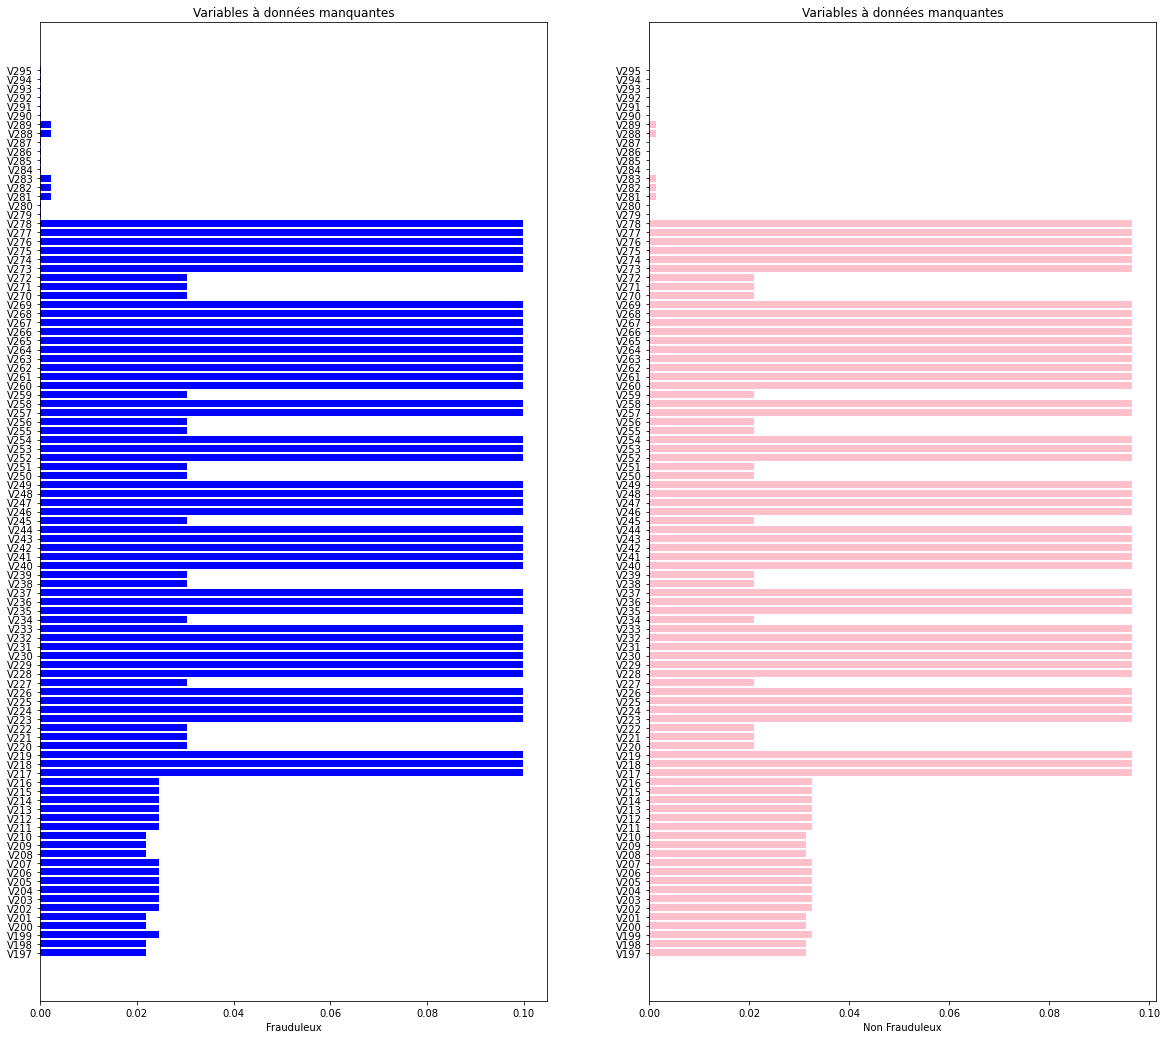

In [27]:
plot_missingness(train_data_explo.iloc[:, 101:200][train_data_explo.isFraud == 1], train_data_explo.iloc[:, 101:200][train_data_explo.isFraud == 0], train_data_explo.iloc[:, 101:200].columns ,"Frauduleux", "Non Frauduleux")

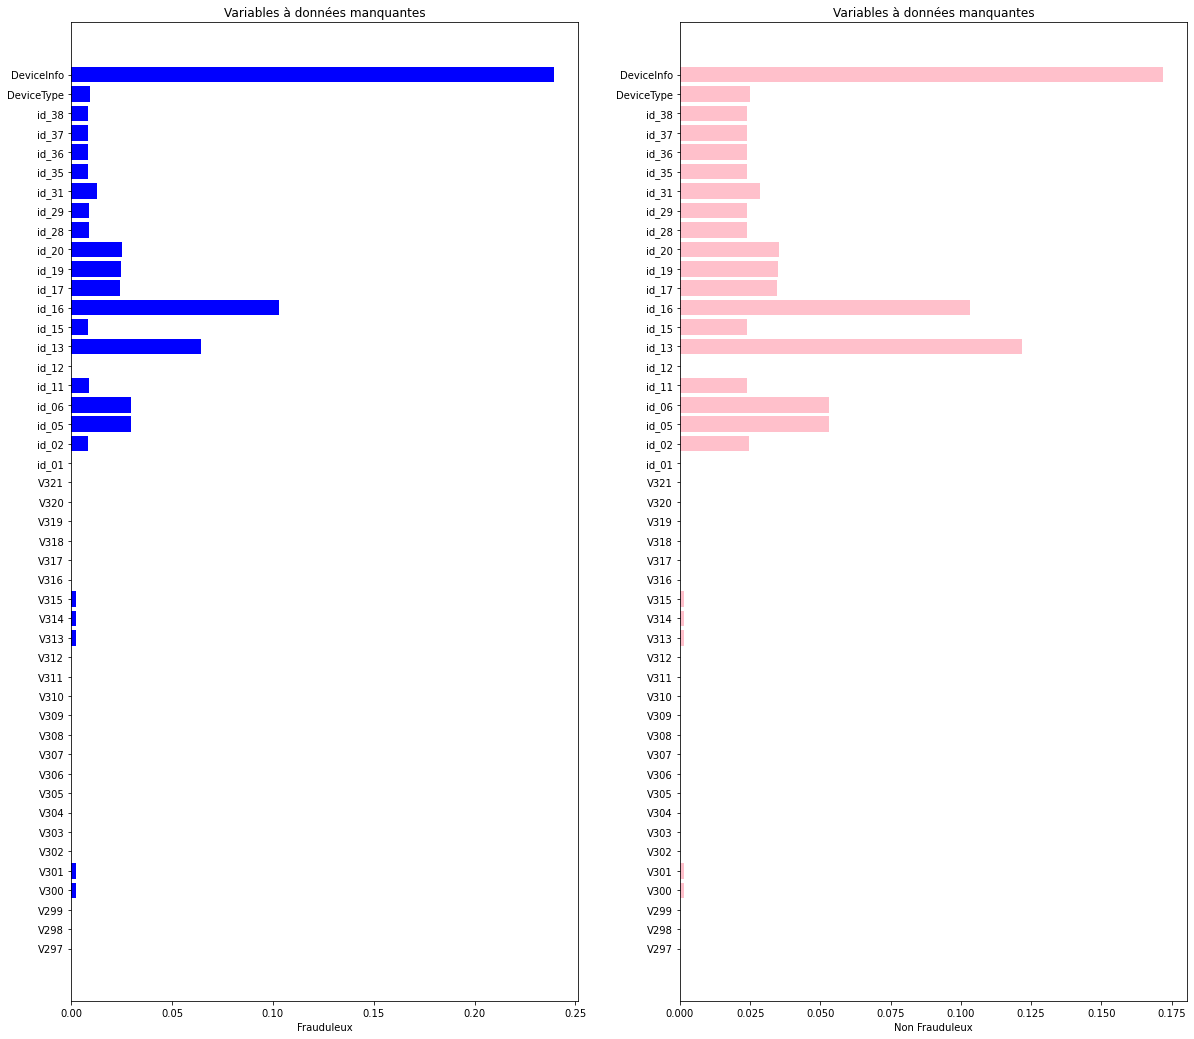

In [28]:
plot_missingness(train_data_explo.iloc[:, 201:][train_data_explo.isFraud == 1], train_data_explo.iloc[:, 201:][train_data_explo.isFraud == 0], train_data_explo.iloc[:, 201:].columns ,"Frauduleux", "Non Frauduleux")

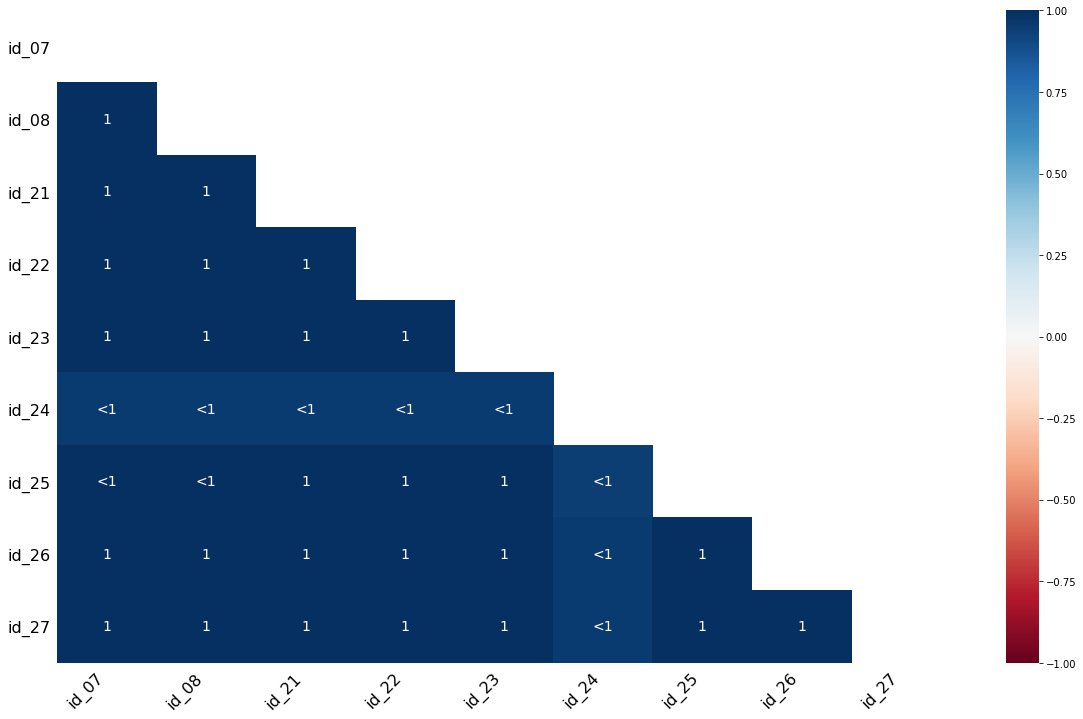

In [ ]:
## A priori toute variable avec déjà plus de 20% de données manquantes ne parait pas adéquat pour la prédiction d'une variable aussi délicate que
## la fraude. On présume une certaine corrélation entre l'absence des valeurs. On passe au diagnostique.
msno.heatmap(train_data_miss_100)


In [ ]:
##De plus 
null_counts[null_counts>=0.8]

dist1    1.000000
D11      1.000000
M1       1.000000
M2       1.000000
M3       1.000000
M5       1.000000
M6       1.000000
M7       1.000000
M8       1.000000
M9       1.000000
V1       1.000000
V2       1.000000
V3       1.000000
V4       1.000000
V5       1.000000
V6       1.000000
V7       1.000000
V8       1.000000
V9       1.000000
V10      1.000000
V11      1.000000
id_07    0.964259
id_08    0.964259
id_21    0.964231
id_22    0.964162
id_23    0.964162
id_24    0.967088
id_25    0.964419
id_26    0.964204
id_27    0.964162
dtype: float64

In [ ]:
###On retire toutes les variables qui commencent par id**
var_to_delete = train_data_miss_100.columns

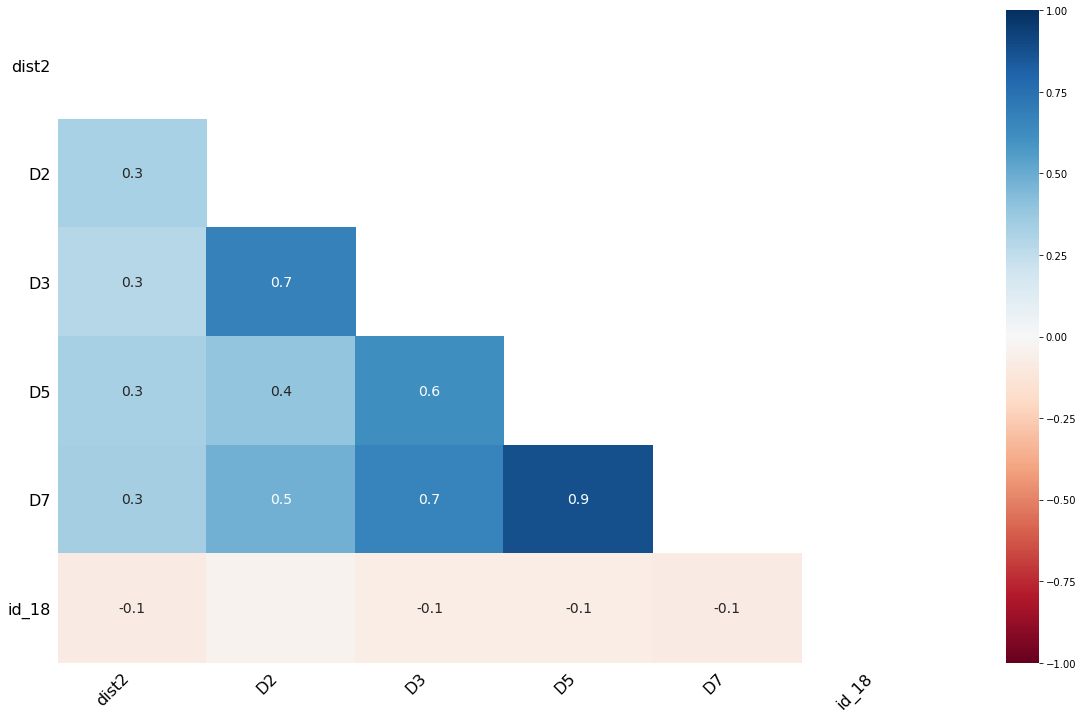

In [ ]:
###La base avec plus de 60%
msno.heatmap(train_data_miss_80)

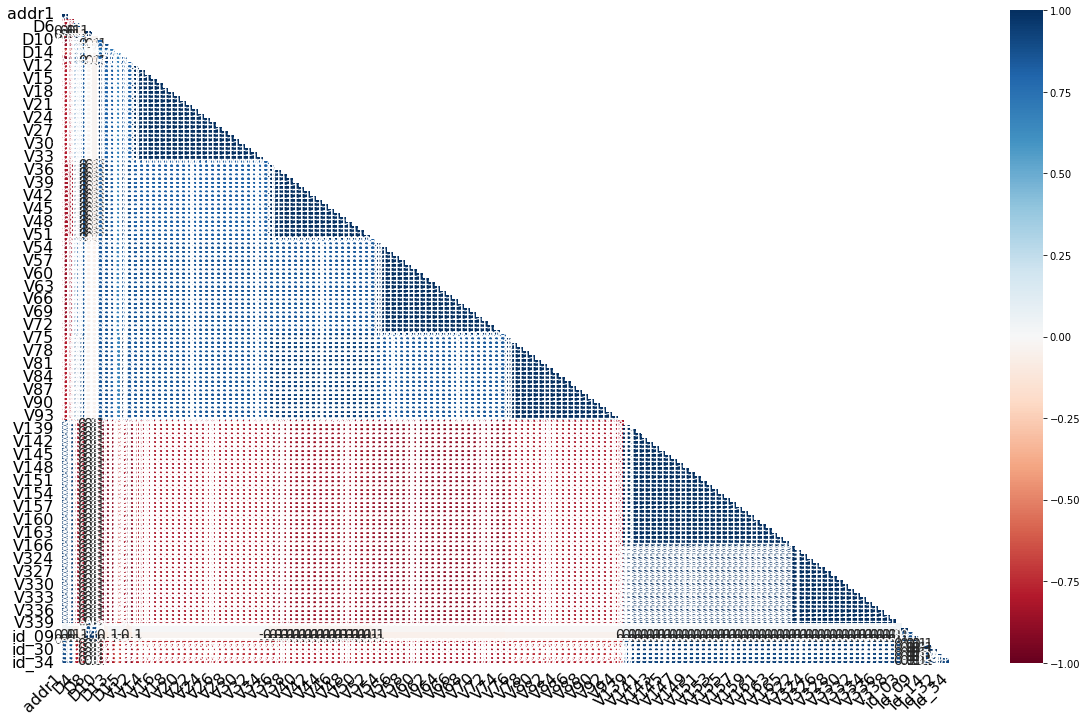

In [ ]:
###La base avec plus de 40%
msno.heatmap(train_data_miss_60)

In [31]:
###On décide de ne retenir que les variables de moins de 20% de données manquantes et de procéder à une imputation par KNN 
train = train.filter(items=null_counts[null_counts<0.2].reset_index()['index'])
train.shape

(144233, 247)

In [33]:
train.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
id_36              object
id_37              object
id_38              object
DeviceType         object
DeviceInfo         object
Length: 247, dtype: object

In [34]:
##On procède à l'imputation des données